This notebook is for a dataset of images you have that you want to pre-process for OCR.
It also begins with an example of why pre-processing is important

In [ ]:
!pip install pytesseract jiwer
!apt install tesseract-ocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [19]:
import os
import sys


# Detect if running in Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    base_dir = "/content/drive/MyDrive/OCR evaluation"
else:
    base_dir = "path/to/your/local/project/folder" # add directory if running locally



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data_dir = os.path.join(base_dir, "Data")
img_path = os.path.join(data_dir, "1926 p4_Page_69_Image_0001.jpg")
img_path = '/content/drive/MyDrive/OCR evaluation/Data/1926 p4_Page_69_Image_0001.jpg'
print(img_path)

/content/drive/MyDrive/OCR evaluation/Data/1926 p4_Page_69_Image_0001.jpg


In [22]:
print("base_dir:", base_dir)
print("data_dir:", data_dir)
img_path = os.path.join(data_dir, "1926 p4_Page_69_Image_0001.jpg")
print("img_path:", repr(img_path))
print("File exists?", os.path.exists(img_path))

base_dir: /content/drive/MyDrive/OCR evaluation
data_dir: /content/drive/MyDrive/OCR evaluation/Data
img_path: '/content/drive/MyDrive/OCR evaluation/Data/1926 p4_Page_69_Image_0001.jpg'
File exists? True


🧠 Tesseract Evaluation Before Preprocessing:
WER: 0.77 | CER: 0.6

🧠 Tesseract Evaluation After Preprocessing:
WER: 0.67 | CER: 0.43


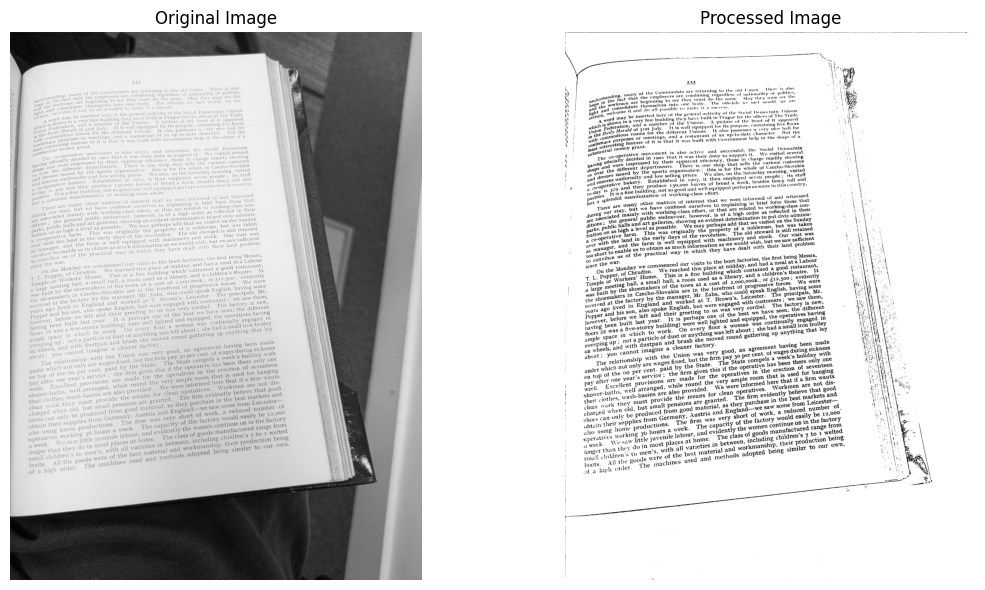

In [24]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
from jiwer import wer, cer
import re

# --- Load Image ---

img_original = cv2.imread(img_path)
img_processed = img_original.copy()

# --- Ground Truth ---
with open(os.path.join(data_dir, "manual text.txt"), "r") as f:
    ground_truth = f.read().lower().strip()
    ground_truth = re.sub(r'[^\w\s]', '', ground_truth)

# --- Preprocessing ---
# Resize
img_processed = cv2.resize(img_processed, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

# Grayscale
img_processed = cv2.cvtColor(img_processed, cv2.COLOR_BGR2GRAY)

# Shadow removal
rgb_planes = cv2.split(img_processed)
result_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7, 7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    result_planes.append(diff_img)
img_processed = cv2.merge(result_planes)

# Dilation and erosion
kernel = np.ones((1, 1), np.uint8)
img_processed = cv2.dilate(img_processed, kernel, iterations=1)
img_processed = cv2.erode(img_processed, kernel, iterations=1)

# Thresholding
img_processed = cv2.threshold(img_processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# --- OCR ---
custom_config = r'--oem 1 --psm 6'

ocr_before = pytesseract.image_to_string(img_original, config=custom_config).lower().strip()
ocr_before = re.sub(r'[^\w\s]', '', ocr_before)

ocr_after = pytesseract.image_to_string(img_processed, config=custom_config).lower().strip()
ocr_after = re.sub(r'[^\w\s]', '', ocr_after)

# --- Evaluation ---
wer_before = round(wer(ground_truth, ocr_before), 2)
wer_after = round(wer(ground_truth, ocr_after), 2)

cer_before = round(cer(ground_truth, ocr_before), 2)
cer_after = round(cer(ground_truth, ocr_after), 2)

# --- Output ---
print("🧠 Tesseract Evaluation Before Preprocessing:")
print(f"WER: {wer_before} | CER: {cer_before}")

print("\n🧠 Tesseract Evaluation After Preprocessing:")
print(f"WER: {wer_after} | CER: {cer_after}")

# --- Visual Comparison (Optional) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_processed, cmap='gray')
axes[1].set_title("Processed Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
dir = #enter input directory

out_dir = #enter output directory
# 🔧 Set your input and output directories
input_dir = "/path/to/your/images"   #  Enter your input folder path here
out_dir = "/path/to/output/folder"  #  Enter where processed images should be saved
list_of_files = os.listdir(input_dir)

This pipeline is standard for image pre-processing.
However, this is a minimal pipeline only using reasonably consistent measures.
If desired, a more ambitious pipeline can be developed, but that may come with associated risks, especially with large datasets.

In [ ]:
for index, file in enumerate(list_of_files):
  img_path = os.path.join(input_dir, file)
  img = cv2.imread(img_path)
   # Extract the file name without the file extension
  file_name = os.path.basename(img_path).split('.')[0]
  file_name = file_name.split()[0]
      # Create a directory for outputs

      # Rescale the image, if needed.
  img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
      # Converting to gray scale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #Removing Shadows
  rgb_planes = cv2.split(img)
  result_planes = []
  result_norm_planes = []
  for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    result_planes.append(diff_img)
    img = cv2.merge(result_planes)

      #Apply dilation and erosion to remove some noise
  kernel = np.ones((1, 1), np.uint8)
  img = cv2.dilate(img, kernel, iterations=1)#increases the white region in the image
  img = cv2.erode(img, kernel, iterations=1) #erodes away the boundaries of foreground object

      #Apply blur to smooth out the edges
      #img = cv2.GaussianBlur(img, (5, 5), 0)

      # Apply threshold to get image with only b&w (binarization)
  img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
  img_pil = Image.fromarray(img)
  img_pil.save(out_dir + '/' + file + '.jpeg')
  print((index+1) + " out of " + str(len(list_of_files)))


1 out of 3230
2 out of 3230
3 out of 3230
4 out of 3230
5 out of 3230
6 out of 3230
7 out of 3230
8 out of 3230
9 out of 3230
10 out of 3230
11 out of 3230
12 out of 3230
13 out of 3230
14 out of 3230
15 out of 3230
16 out of 3230
17 out of 3230
18 out of 3230
19 out of 3230
20 out of 3230
21 out of 3230
22 out of 3230
23 out of 3230
24 out of 3230
25 out of 3230
26 out of 3230
27 out of 3230
28 out of 3230
29 out of 3230
30 out of 3230
31 out of 3230
32 out of 3230
33 out of 3230
34 out of 3230
35 out of 3230
36 out of 3230
37 out of 3230
38 out of 3230
39 out of 3230
40 out of 3230
41 out of 3230
42 out of 3230
43 out of 3230
44 out of 3230
45 out of 3230
46 out of 3230
47 out of 3230
48 out of 3230
49 out of 3230
50 out of 3230
51 out of 3230
52 out of 3230
53 out of 3230
54 out of 3230
55 out of 3230
56 out of 3230
57 out of 3230
58 out of 3230
59 out of 3230
60 out of 3230
61 out of 3230
62 out of 3230
63 out of 3230
64 out of 3230
65 out of 3230
66 out of 3230
67 out of 3230
68 o